# Loading Our Dataset

In [72]:
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

print(x_train.shape)

(60000, 28, 28)


# examine size and image dimension (not required but good practice to know about your data)

In [73]:
print("initial shape/dimension of train data set: ",x_train.shape)
print("No. of samples in train dataset: ",len(x_train))
print("No. of labels in test dataset: ",len(y_train))
print("No. of samples in test dataset: ",len(x_test))
print("No. of labels in test dataset: ",len(y_test))
print(" ")
print("dimensions of images in train dataset: ",x_train[0].shape)
print("labels in train: ",y_train.shape)
print("dimensions of images in test dataset: ",x_test[0].shape)
print("labels in test: ",y_test.shape)

initial shape/dimension of train data set:  (60000, 28, 28)
No. of samples in train dataset:  60000
No. of labels in test dataset:  60000
No. of samples in test dataset:  10000
No. of labels in test dataset:  10000
 
dimensions of images in train dataset:  (28, 28)
labels in train:  (60000,)
dimensions of images in test dataset:  (28, 28)
labels in test:  (10000,)


# getting our data in shape (x_train and x_test)

In [74]:
img_rows=x_train[0].shape[0]
#print(img_rows)
img_cols=x_train[0].shape[1]
#print(img_cols)

x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)
#we got everything till now in int we have to convert to float for keras 
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#normalization: as we are using non color images so we need to divide it by 255(0-255 range of colors)
x_train/=255
x_test/=255

print("x_train shape -> ",x_train.shape)

print("y_train shape -> ",y_train.shape)

print("x_test shape -> ",x_test.shape)

print("y_test shape -> ",y_test.shape)

x_train shape ->  (60000, 28, 28, 1)
y_train shape ->  (60000,)
x_test shape ->  (10000, 28, 28, 1)
y_test shape ->  (10000,)


# hot encoding our data (y_train and y_test)

In [75]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

print("No. of classes: " ,y_test.shape[1],"(0-9)")
num_classes=y_test.shape[1]
num_pixels=x_train.shape[1]*x_train.shape[2]
print(x_train.shape[1],"X",x_train.shape[2],'=',num_pixels)


No. of classes:  10 (0-9)
28 X 28 = 784


# building our model

layers in our model:
1. conv
2. conv
3. pooling
4. dropout
5. flatten
6. dense
7. dropout 
8. dense


In [76]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten, Conv2D , MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])
print(model.summary())
              

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
__________

# training our classifier

In [78]:
batch_size=32
epochs=10
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print("Test Loss: " ,score[0])
print("Test Accuracy: " ,score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.2990 - acc: 0.9090 - val_loss: 0.1407 - val_acc: 0.9574
Epoch 2/10
60000/60000 [==============================] - 123s 2ms/step - loss: 0.2220 - acc: 0.9351 - val_loss: 0.1056 - val_acc: 0.9689
Epoch 3/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.1722 - acc: 0.9481 - val_loss: 0.0824 - val_acc: 0.9753
Epoch 4/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.1383 - acc: 0.9595 - val_loss: 0.0673 - val_acc: 0.9792
Epoch 5/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.1182 - acc: 0.9649 - val_loss: 0.0617 - val_acc: 0.9801
Epoch 6/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.1056 - acc: 0.9676 - val_loss: 0.0545 - val_acc: 0.9816
Epoch 7/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0970 - acc: 0.9710 - val_loss: 0.0487 - 

# Plotting loss and accuracy

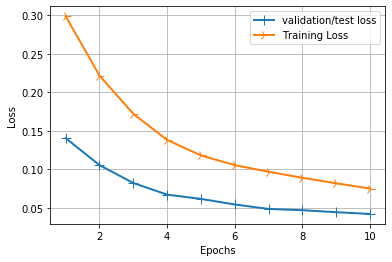

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict["val_loss"]
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='validation/test loss')
line2=plt.plot(epochs , loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

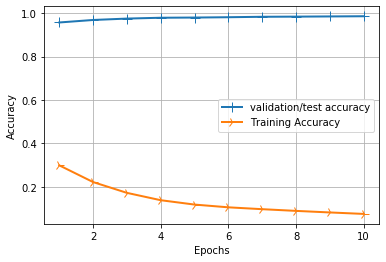

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict["val_acc"]
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='validation/test accuracy')
line2=plt.plot(epochs , loss_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# saving the model we just trained

In [86]:
model.save("/Users/VEDANT MEHTA/Desktop/My new Udemy Course/Digit_recognition/digit_recognition_model.h5")
print("model saved successfully!!")

model saved successfully!!
